In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

Epoch 1/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 94008.7812 - mae: 213.8355 - val_loss: 56755.8125 - val_mae: 163.3681
Epoch 2/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 51385.0859 - mae: 152.2182 - val_loss: 39359.5312 - val_mae: 131.1403
Epoch 3/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 38197.6562 - mae: 127.0671 - val_loss: 31272.4316 - val_mae: 113.2189
Epoch 4/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 29036.8242 - mae: 110.0518 - val_loss: 23879.6562 - val_mae: 99.6817
Epoch 5/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 22288.7402 - mae: 96.7721 - val_loss: 20201.7676 - val_mae: 92.0027
Epoch 6/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 18887.6895 - mae: 88.3834 - val_loss: 17910.0430 - val_mae: 84.9720
Epoch 7/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 17288.1309 - mae: 83.8529 - val_loss: 16512.3672 - val_mae: 83.3527
Epoch 8/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 15945.4023 

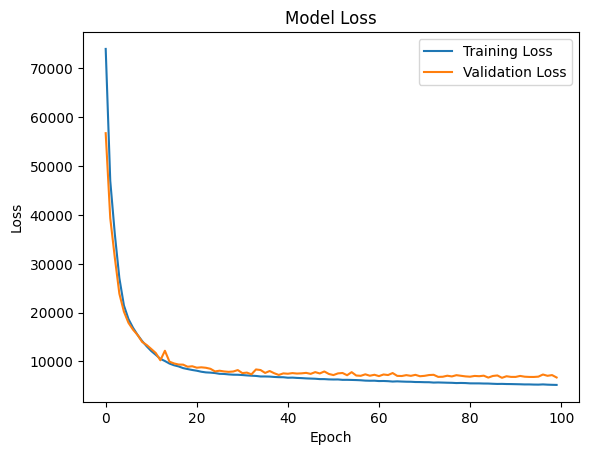

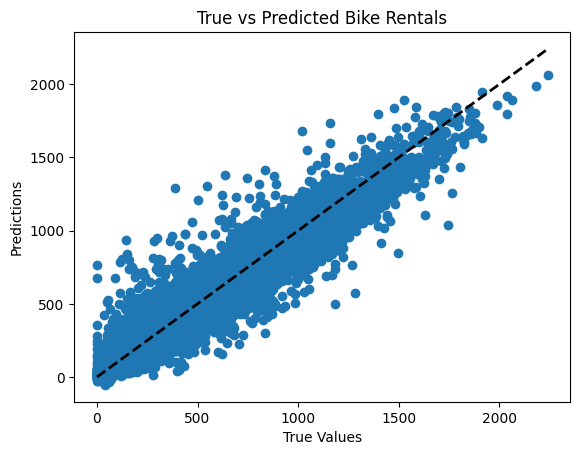

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# Convert 'dteday' to datetime and extract features
bikes['dteday'] = pd.to_datetime(bikes['dteday'])
bikes['year'] = bikes['dteday'].dt.year
bikes['month'] = bikes['dteday'].dt.month
bikes['day'] = bikes['dteday'].dt.day
bikes.drop(columns=['dteday'], inplace=True)  # Drop the original date column

# Bin the windspeed into categories
wind_bins = [-np.inf, 0, 5, 10, 15, 20, np.inf]  # 6 edges
wind_labels = ['Very Calm', 'Calm', 'Light', 'Moderate', 'Strong', 'Very Strong']  # 6 labels
bikes['windspeed_bin'] = pd.cut(bikes['windspeed'], bins=wind_bins, labels=wind_labels)

# One-hot encode categorical variables
bikes = pd.get_dummies(bikes, columns=['weathersit', 'season', 'windspeed_bin'], drop_first=True)

# Define features and target variable
X = bikes.drop(columns=['casual', 'registered'])  # Use 'casual' and 'registered' as targets or combine them
y = bikes['casual'] + bikes['registered']  # Predict total bike rentals

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Fix the shape to a tuple
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

# Calculate percentage metrics
within_5 = np.mean(np.abs((y_test - y_pred.flatten()) / y_test) < 0.05) * 100
within_10 = np.mean(np.abs((y_test - y_pred.flatten()) / y_test) < 0.10) * 100
within_20 = np.mean(np.abs((y_test - y_pred.flatten()) / y_test) < 0.20) * 100

# Display metrics
print(f'Within 5%: {within_5:.2f}%')
print(f'Within 10%: {within_10:.2f}%')
print(f'Within 20%: {within_20:.2f}%')
print(f'R^2: {r_squared:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Median Absolute Error: {medae:.4f}')

# Optional: Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Optional: Plotting true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Bike Rentals')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
bikes_m = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')

# Convert 'dteday' to datetime and extract features
bikes_m['dteday'] = pd.to_datetime(bikes_m['dteday'])
bikes_m['year'] = bikes_m['dteday'].dt.year
bikes_m['month'] = bikes_m['dteday'].dt.month
bikes_m['day'] = bikes_m['dteday'].dt.day
bikes_m.drop(columns=['dteday'], inplace=True)

# Bin the windspeed into categories
wind_bins = [-np.inf, 0, 5, 10, 15, 20, np.inf]
wind_labels = ['Very Calm', 'Calm', 'Light', 'Moderate', 'Strong', 'Very Strong']
bikes_m['windspeed_bin'] = pd.cut(bikes_m['windspeed'], bins=wind_bins, labels=wind_labels)

# One-hot encode categorical variables
bikes_m = pd.get_dummies(bikes_m, columns=['weathersit', 'season', 'windspeed_bin'], drop_first=True)

# Check the shape of the processed data
print(bikes_m.shape)  # Should print (number_of_samples, number_of_features)

# Define your model
model = keras.Sequential([
    layers.Input(shape=(bikes_m.shape[1],)),  # Match number of features
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Assuming regression task
])

# Prepare your target variable y here, e.g., y = bikes_m['target_variable']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(bikes_m, y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(scaler.transform(bikes_m))

# Save predictions to a DataFrame
my_predictions = pd.DataFrame(predictions, columns=['predictions'])
my_predictions.to_csv('team4-module4-predictions.csv', index=False)
